## Importing Required Libraries

This step involves importing all the necessary libraries for data manipulation, visualization, preprocessing, machine learning, and deep learning. Libraries such as pandas, numpy, seaborn, matplotlib, scikit-learn, and TensorFlow are used for various tasks including data loading, preprocessing, feature extraction, model training, and evaluation.

In [1]:
from pandas import  *
from numpy import *
from seaborn import *
from matplotlib.pyplot import *
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import re
import string

## Preprocessing the Text Data

A function is defined to preprocess the text data. This function converts all text to lowercase, removes punctuation, and eliminates extra whitespace. Preprocessing is crucial for cleaning the text and ensuring consistency before feature extraction.

In [2]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(f'[{re.escape(string.punctuation)}]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

## Loading the Dataset

The dataset containing comments and their corresponding emotions is loaded into a pandas DataFrame from a CSV file.

In [3]:
df = read_csv('Emotion_classify_Data.csv')

## Applying Preprocessing to the Comments

The preprocessing function is applied to the 'Comment' column of the DataFrame to clean all the text data.

In [4]:
df['Comment'] = df['Comment'].apply(preprocess_text)

## Vectorizing the Text Data

The cleaned text data is transformed into numerical features using the TF-IDF vectorizer. This converts the text into a matrix of TF-IDF features, which can be used as input for machine learning models.

In [5]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=10000)
X = vectorizer.fit_transform(df['Comment'])
y = df['Emotion']

## Splitting the Data into Training and Testing Sets

The feature matrix and labels are split into training and testing sets to evaluate the model's performance on unseen data.

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Random Forest Classifier

A Random Forest classifier is initialized and trained on the training data. This model will learn to classify the emotions based on the TF-IDF features.

In [7]:
model = RandomForestClassifier(n_estimators=200, random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=1)

## Saving the Trained Model

The trained Random Forest model is saved to disk using joblib for future use, so it does not need to be retrained every time.

In [8]:
import joblib
joblib.dump(model,'Emotion_RF.pkl')

['Emotion_RF.pkl']

## Loading the Saved Model

The saved model is loaded from disk using joblib. This allows for predictions without retraining the model.

In [9]:
import joblib
model=joblib.load('Emotion_RF.pkl')

## Evaluating Model Performance on Training Data

The accuracy of the model on the training data is calculated to check how well the model has learned from the training set.

In [10]:
model.score(X_train, y_train)

0.9991577174141925

## Evaluating Model Performance on Test Data

The accuracy of the model on the test data is calculated to evaluate its generalization performance.

In [11]:
model.score(X_test, y_test)

0.9427609427609428

## Defining the Prediction Function

A function is defined to predict the emotion of a given input text. The text is preprocessed, vectorized, and then passed to the trained model for prediction.

In [12]:
def predict_emotion(text):
    processed_text = preprocess_text(text)
    vectorized_text = vectorizer.transform([processed_text])
    prediction = model.predict(vectorized_text)
    return prediction[0]

## Predicting Emotion for a Positive Example

An example input text expressing a positive emotion is provided. The prediction function is used to determine the emotion.

In [13]:
input_text = "I am feeling great and very happy today!"

## Displaying the Predicted Emotion for the Positive Example

The predicted emotion for the provided positive input text is printed.

In [14]:
predicted_emotion = predict_emotion(input_text)
print(f'The predicted emotion is: {predicted_emotion}')

The predicted emotion is: joy


## Predicting Emotion for a Negative Example

An example input text expressing a negative emotion is provided. The prediction function is used to determine the emotion.

In [15]:
input_text = "Boring shit very bad day "

## Displaying the Predicted Emotion for the Negative Example

The predicted emotion for the provided negative input text is printed.

In [16]:
predicted_emotion = predict_emotion(input_text)
print(f'The predicted emotion is: {predicted_emotion}')

The predicted emotion is: anger


## Predicting Emotion for Another Negative Example

Another example input text expressing a negative emotion is provided. The prediction function is used to determine the emotion.

In [17]:
input_text = "i hate doing all my homework stuffs"

## Displaying the Predicted Emotion for the Second Negative Example

The predicted emotion for the second negative input text is printed.

In [18]:
predicted_emotion = predict_emotion(input_text)
print(f'The predicted emotion is: {predicted_emotion}')

The predicted emotion is: anger


## End of Notebook

This cell marks the end of the notebook.

## Confusion Matrix and Accuracy Score

To further evaluate the model's performance, we display the confusion matrix and the accuracy score on the test set. The confusion matrix provides insight into the types of errors the model is making, while the accuracy score gives an overall measure of performance.

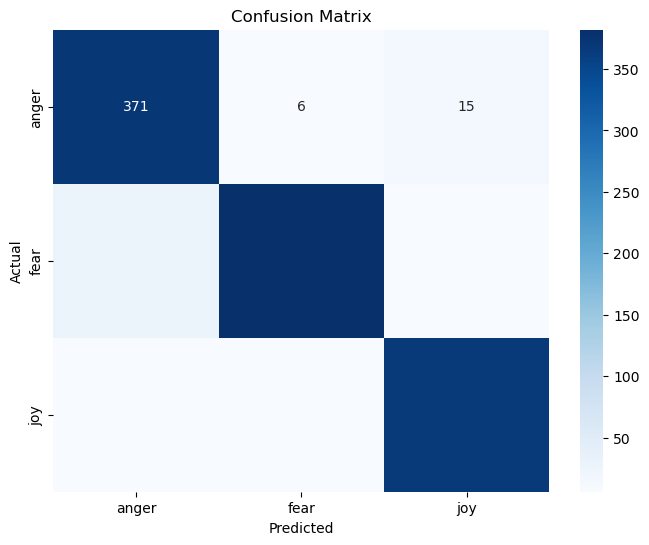

Accuracy Score: 0.9428


In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'Accuracy Score: {acc:.4f}')